### Toast Optimisation

#### I solved the tasks between easy and very hard.

In [21]:
# Import Everything
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from main import utility, OptimiseAlgo

##### easy:
#####     - implement it with only two parameters: toast_duration and wait_duration
#####     - e.g., utility(2,3)
#####     - Implement the function by testing all possible values for these variables.
#####     - (This state space has only 10000 values, so it shouldn't take too long)
#####

### Step1: Plot a graph

Text(0.5, 0, 'utility')

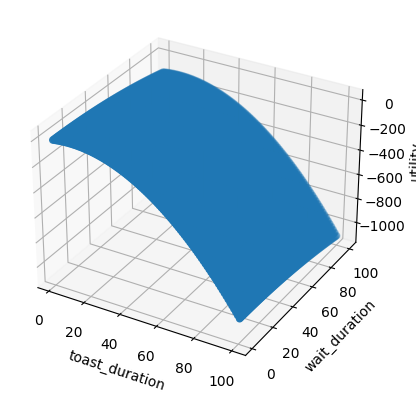

In [4]:
all_possible_values = [(i, j) for i in range(1, 101) for j in range(1, 101)]
all_possible_values_and_utility = [(value[0], value[1], utility(*value)) for value in all_possible_values]
df = pd.DataFrame(all_possible_values_and_utility, columns=['toast_duration', 'wait_duration', 'utility'])
ax = plt.axes(projection='3d')
ax.scatter(df['toast_duration'], df['wait_duration'], df['utility'])
ax.set_xlabel('toast_duration')
ax.set_ylabel('wait_duration')
ax.set_zlabel('utility')

### Step2: Implement exhaustive search
As we can see on the graph above, all we have to do is to find the combination of toast_duration and wait_duration, which has the highest utility value.

The exhaustive search is an algorithm to check every combination to find the highest utility value.

I already implemented on main.py.

So, I'm gonna use it here.


In [15]:
optimiseAlgo = OptimiseAlgo(utility)
# use the function and see what it thinks the optimum is
optimum = optimiseAlgo.simple_exhaustive_search()
print(
    "Optimum:",
    optimum,
)
print("value:", utility(*optimum))

Optimum: (10, 1)
value: 2.4


##### Medium:
#####     - Implement hill-climbing for 2 discrete parameters
These are steps to implement hill-climbing
1. Define objective function: a function to maximise profits or minimise losses
2. Define range for input
3. Generate an initial point (toast_duration, wait_duration)
4. Evaluate the initial point with the objective function
5. Loop over a predefined number of iterations (e.g., n_iterations = 100)
6. Take the best neighbour
7. Evaluate the neighbour with the objective function
8. If the new candidate value is better, replace the current point with the candidate


### But I already implemented hill-climbing and imported it here

In [17]:
optimiseAlgo = OptimiseAlgo(utility)
# use the function and see what it thinks the optimum is
optimum = optimiseAlgo.medium_hill_climbing(n_iterations=100)
print("Like you can see, we can get the optimum just by 100 iterations")
print(
    "Optimum:",
    optimum,
)
print("value:", utility(*optimum))

Like you can see, we can get the optimum just by 100 iterations
Optimum: (10, 1)
value: 2.4


##### Hard:
#####     - Implement gradient-ascent for 3 parameters

Gradient ascent is an algorithm used in machine learning to maximize a function. 

It's like climbing a hill: you start at the bottom and take small steps in the direction of the steepest uphill slope until you reach the top.

Steps:
1. Initialise the weights to some starting values. These weights are used to compute the function we want to maximize.

2. Start a loop that continues until we reach a point where the weights don't change much anymore, which means we have converged to a local maximum of the function.

3. Compute the gradient of the function with respect to the weights. The gradient is like a compass that tells us in which direction the function increases the most.

4. Update the weights by taking a small step in the direction of the gradient. The step size is determined by a hyperparameter called the learning rate, which is typically set to a small value. The idea is to take small steps so that we don't overshoot the maximum.

5. Return the weights that maximise the function.


#### Like always, I'm gonna import the func from main.py.

In [20]:
optimiseAlgo = OptimiseAlgo(utility)
# If the learning rate is too low, the model will take a long time to converge to the optimal solution, or may even get stuck in a local minimum. On the other hand, if the learning rate is too high, the model may overshoot the optimal solution and fail to converge.
optimum = optimiseAlgo.hard_gradient_ascent(n_iterations=100, learning_rate=0.1)
print(
    "Optimum:",
    optimum,
)
print("value:", utility(*optimum))

Optimum: (6, 23, 1.983628327959539)
value: 2.3078857340032117


### Very-Hard 
### - Implement repeated search + gradient ascent to find the global maximum for 3 parameters

This means that we have to implement Epoch.

In machine learning, an epoch refers to one complete cycle through the entire training dataset during the learning process. In other words, during an epoch, the machine learning model sees every training example once.

For example, if you have 1,000 training examples and set your batch size to 100, then it will take 10 iterations to complete one epoch. During each iteration, the model will update its weights based on the loss it calculated on the current batch. After an epoch is completed, the weights of the model will be updated once based on the loss calculated across all the training examples in the dataset.

Generally, a model is trained over multiple epochs until it achieves the desired level of accuracy or until it stops improving.

### As always, I'm gonna import the func on main.py.

In [30]:
optimiseAlgo = OptimiseAlgo(utility)
optimum = optimiseAlgo.very_hard_gradient_ascent(epochs=100, n_iterations=100, learning_rate=0.01)
print("\n")
print(
    "The best Optimum:",
    optimum,
)
print("The best value:", utility(*optimum))

epoch 0: (10, 100, 1.0020001333583781) -115.2312026401435
epoch 1: (16, 46, 1.3553109500399105) 14.103146928799063
epoch 2: (92, 100, 1.630318664075338) -1018.8069355611457
epoch 3: (100, 100, 0.3736816026411461) -973.540633637636
epoch 4: (100, 7, 0.3736816026404494) -868.6121638914797
epoch 5: (100, 100, 0.37368160264830813) -973.540633637636
epoch 6: (100, 98, 1.0020001333604949) -1082.688424014655
epoch 7: (16, 43, 0.7269924192510968) 14.83628444465578
epoch 8: (13, 11, 1.355310949985573) -0.06454529489146733
epoch 9: (100, 100, 1.0020001333587356) -1087.3932080407915
epoch 10: (16, 22, 1.3553109499919083) 3.879172222817274
epoch 11: (100, 40, 1.630318664076549) -1091.4642670231917
epoch 12: (15, 7, 0.7269924190085899) 0.6631603242857048
epoch 13: (100, 85, 1.0020001333615394) -1054.4477178577695
epoch 14: (100, 31, 1.0020001333592357) -980.5634054473203
epoch 15: (15, 24, 1.3553109491212305) 3.737172595235041
epoch 16: (10, 23, 0.09867388855516442) 2.5468562257475664
epoch 17: (10